In [1]:
import numpy as np

In [2]:
data=np.loadtxt(open('.\machine-learning-exercise-master\coursera-machine-learning-python\ex1\ex1data2.txt','r'),delimiter=',')
X=data[:,0:2]
y=data[:,2]
m=len(y)

In [4]:
print('First 10 examples from datast:\n')
for i in range(10):
    print("x=",X[i,:],'y=',y[i])

First 10 examples from datast:

x= [2104.    3.] y= 399900.0
x= [1600.    3.] y= 329900.0
x= [2400.    3.] y= 369000.0
x= [1416.    2.] y= 232000.0
x= [3000.    4.] y= 539900.0
x= [1985.    4.] y= 299900.0
x= [1534.    3.] y= 314900.0
x= [1427.    3.] y= 198999.0
x= [1380.    3.] y= 212000.0
x= [1494.    3.] y= 242500.0


In [5]:
#数据正态化
def feature_normalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0,ddof=1)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma

In [6]:
#增加截距项
X,mu,sigma=feature_normalize(X)
X=np.hstack((np.ones((m,1)),X))

In [7]:
#定义损失函数
def compute_multi(X,y,theta):
    m=len(y)
    diff=X.dot(theta)-y
    J=1.0/(2*m)*diff.T.dot(diff)
    return J

In [8]:
#定义梯度下降
def gradient_descent_multi(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=np.zeros(num_iters)
    for i in range(num_iters):
        theta-=alpha/m*((X.dot(theta)-y).T.dot(X))
        J_history[i]=compute_multi(X,y,theta)
    return theta,J_history

In [11]:
alpha=0.15
num_iters=400
theta=np.zeros(3)

In [12]:
#计算梯度下降
theta,J_history=gradient_descent_multi(X,y,theta,alpha,num_iters)

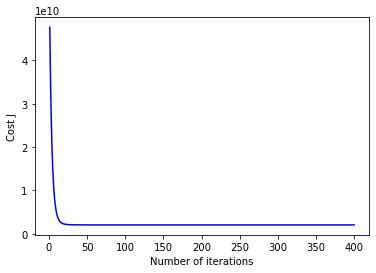

In [14]:
#梯度下降曲线
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1,num_iters+1),J_history,color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [15]:
print('Theta computed from gradient descent')
print(theta)

Theta computed from gradient descent
[340412.65957447 110631.0502787   -6649.47427067]


In [16]:
#预测
normalize_test_data=((np.array([1650,3])-mu)/sigma)
normalize_test_data=np.hstack((np.ones(1),normalize_test_data))
price=normalize_test_data.dot(theta)
print('Predicted Price of a 1650 sq-ft 3 br house:',price)

Predicted Price of a 1650 sq-ft 3 br house: 293081.46433492796


In [17]:
#正态方程
data=np.loadtxt(open('.\machine-learning-exercise-master\coursera-machine-learning-python\ex1\ex1data2.txt','r'),delimiter=',')
X=data[:,0:2]
y=data[:,2]
m=len(y)
X=np.hstack((np.ones((m,1)),X))

In [18]:
#定义正太方程
def normal_eqn(X,y):
    theta=np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [19]:
theta=normal_eqn(X,y)
print('Theta computed from the normal equations:')
print(theta)

Theta computed from the normal equations:
[89597.90954355   139.21067402 -8738.01911255]


In [20]:
price=np.array([1,1650,3]).dot(theta)
print('Predicted price of a 1650 sq-ft 3 br house(using normal equations):',price)

Predicted price of a 1650 sq-ft 3 br house(using normal equations): 293081.4643349721
